In [1]:
import csv
import pandas as pd

# Load the CSV file to analyze its structure
data = pd.read_csv('DS-predictive-maintenance-data.csv')

# Display the first few rows and basic info about the dataset to understand its structure
data.head()


,Machine ID,Timestamp,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,Failure
0,e0d1202e-ada0-4f29-9972-e57008e11d70,6/1/2023 11:59,55.57,146.26,4.12,16540,Yes,No
1,5b36c9d4-ec3a-4459-a408-461563caa1db,3/5/2023 3:35,87.08,459.80,2.92,3199,No,Yes
2,8a8f478c-bea8-4b9b-a8c0-004cb8034c72,5/25/2023 6:33,62.24,176.03,3.84,3989,No,No
3,c8437f2d-a812-447c-88fb-6abe325fde5b,12/30/2022 8:03,56.98,117.75,0.96,3797,No,No
4,fe8b5529-e3d3-408a-bff6-5b2fbe37393a,12/14/2022 17:22,55.12,274.42,2.64,4054,Yes,Yes


# Data Exploration and Preprocessing

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine ID           363 non-null    object 
 1   Timestamp            363 non-null    object 
 2   Temperature          363 non-null    float64
 3   Pressure             363 non-null    float64
 4   Vibration            363 non-null    float64
 5   Operational Hours    363 non-null    int64  
 6   Maintenance History  363 non-null    object 
 7   Failure              363 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 22.8+ KB


In [3]:
data.describe()

,Temperature,Pressure,Vibration,Operational Hours
count,363.000000,363.000000,363.000000,363.000000
mean,74.305152,303.941185,2.599256,10576.355372
std,14.607708,109.919002,1.430427,5412.653954
min,50.110000,104.910000,0.110000,1172.000000
25%,61.725000,211.715000,1.410000,5671.000000
50%,74.680000,296.700000,2.480000,11124.000000
75%,86.675000,399.900000,3.890000,15285.000000
max,99.870000,498.650000,5.000000,19988.000000


In [4]:
from sklearn.preprocessing import StandardScaler

# Convert categorical columns to numerical (Yes -> 1, No -> 0)
data['Maintenance History'] = data['Maintenance History'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Failure'] = data['Failure'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = data['Timestamp'].replace('2/29/2023  9:49:10 PM', '2/28/2023 21:49')  #this value was causing error so handled it here
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data.head()


,Machine ID,Timestamp,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,Failure
0,e0d1202e-ada0-4f29-9972-e57008e11d70,2023-06-01 11:59:00,55.57,146.26,4.12,16540,1,0
1,5b36c9d4-ec3a-4459-a408-461563caa1db,2023-03-05 03:35:00,87.08,459.80,2.92,3199,0,1
2,8a8f478c-bea8-4b9b-a8c0-004cb8034c72,2023-05-25 06:33:00,62.24,176.03,3.84,3989,0,0
3,c8437f2d-a812-447c-88fb-6abe325fde5b,2022-12-30 08:03:00,56.98,117.75,0.96,3797,0,0
4,fe8b5529-e3d3-408a-bff6-5b2fbe37393a,2022-12-14 17:22:00,55.12,274.42,2.64,4054,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Machine ID           363 non-null    object        
 1   Timestamp            363 non-null    datetime64[ns]
 2   Temperature          363 non-null    float64       
 3   Pressure             363 non-null    float64       
 4   Vibration            363 non-null    float64       
 5   Operational Hours    363 non-null    int64         
 6   Maintenance History  363 non-null    int64         
 7   Failure              363 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 22.8+ KB


# Feature Engineering

In [6]:
# Feature Engineering: Create new features based on the existing data

data['Temp_Rolling_Avg'] = data['Temperature'].rolling(window=5).mean().fillna(data['Temperature'].mean())
data['Pressure_Fluctuation'] = data['Pressure'].rolling(window=5).apply(lambda x: x.max() - x.min()).fillna(0)
data['Cumulative_Vibration'] = data['Vibration'].cumsum()

data[['Temp_Rolling_Avg', 'Pressure_Fluctuation', 'Cumulative_Vibration']].head()


,Temp_Rolling_Avg,Pressure_Fluctuation,Cumulative_Vibration
0,74.305152,0.00,4.12
1,74.305152,0.00,7.04
2,74.305152,0.00,10.88
3,74.305152,0.00,11.84
4,63.398000,342.05,14.48


In [7]:
# Sort data by Machine ID and Timestamp
data = data.sort_values(by=['Timestamp'])
data.head()

,Machine ID,Timestamp,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,Failure,Temp_Rolling_Avg,Pressure_Fluctuation,Cumulative_Vibration
268,eb93caa3-b269-4385-87fa-8cea58d53e6e,2022-08-21 17:18:00,76.45,338.72,1.47,10692,0,1,81.656,193.48,692.44
278,f950faa2-101c-474a-997e-6a40a124de32,2022-08-22 07:08:00,64.09,216.85,0.40,6316,0,0,73.338,265.00,717.49
305,6d9dbdda-f7a5-4ea3-8c64-3a40c77584f2,2022-08-23 09:03:00,52.09,252.15,0.64,7543,0,0,64.294,158.13,799.42
238,a161e166-186d-4138-9745-f7abad40aad8,2022-08-27 12:50:00,51.99,262.57,3.41,11923,0,0,75.338,145.90,608.00
128,63a0b7d0-0d25-45c1-86dd-83e16619096f,2022-08-28 02:53:00,99.27,209.17,1.51,10486,1,0,75.478,249.95,330.71


# Model Development

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 268 to 143
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Machine ID            363 non-null    object        
 1   Timestamp             363 non-null    datetime64[ns]
 2   Temperature           363 non-null    float64       
 3   Pressure              363 non-null    float64       
 4   Vibration             363 non-null    float64       
 5   Operational Hours     363 non-null    int64         
 6   Maintenance History   363 non-null    int64         
 7   Failure               363 non-null    int64         
 8   Temp_Rolling_Avg      363 non-null    float64       
 9   Pressure_Fluctuation  363 non-null    float64       
 10  Cumulative_Vibration  363 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 34.0+ KB


# Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Features and target (excluding Machine ID and Timestamp)
X = data.drop(['Machine ID', 'Timestamp', 'Failure'], axis=1)
y = data['Failure']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Displaying the Random Forest results
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Precision: {precision_rf:.2f}")
print(f"Random Forest Recall: {recall_rf:.2f}")
print(f"Random Forest F1 Score: {f1_rf:.2f}")

Random Forest Accuracy: 0.48
Random Forest Precision: 0.54
Random Forest Recall: 0.35
Random Forest F1 Score: 0.42


# predictive model using XGBoost

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Training the XGBoost model
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Displaying the XGBoost results
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost Precision: {precision_xgb:.2f}")
print(f"XGBoost Recall: {recall_xgb:.2f}")
print(f"XGBoost F1 Score: {f1_xgb:.2f}")


XGBoost Accuracy: 0.52
XGBoost Precision: 0.59
XGBoost Recall: 0.42
XGBoost F1 Score: 0.49


C:\Users\LENOVO PC\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:14:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Support Vector Machine (SVM) Model

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42)

# Training the SVM model
svm_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Displaying the SVM results
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM Precision: {precision_svm:.2f}")
print(f"SVM Recall: {recall_svm:.2f}")
print(f"SVM F1 Score: {f1_svm:.2f}")


SVM Accuracy: 0.60
SVM Precision: 0.61
SVM Recall: 0.75
SVM F1 Score: 0.67


# Gradient Boosting Model

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Training the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Displaying the Gradient Boosting results
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")
print(f"Gradient Boosting Precision: {precision_gb:.2f}")
print(f"Gradient Boosting Recall: {recall_gb:.2f}")
print(f"Gradient Boosting F1 Score: {f1_gb:.2f}")


Gradient Boosting Accuracy: 0.52
Gradient Boosting Precision: 0.58
Gradient Boosting Recall: 0.45
Gradient Boosting F1 Score: 0.51


# Combine Gradient Boosting and XGBoost Using Averaging

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Combine the predicted probabilities using weighted average (50% weight for each model)
# You can change the weights if one model performs better
combined_pred_proba = (0.5 * y_pred_proba_gb) + (0.5 * y_pred_proba_xgb)

# Convert probabilities to final predictions using a threshold of 0.5
combined_pred = np.where(combined_pred_proba >= 0.5, 1, 0)

# Evaluate the combined model
accuracy_combined = accuracy_score(y_test, combined_pred)
precision_combined = precision_score(y_test, combined_pred)
recall_combined = recall_score(y_test, combined_pred)
f1_combined = f1_score(y_test, combined_pred)

# Displaying the combined model results
print(f"Ensemble Model (GB + XGBoost) Accuracy: {accuracy_combined:.2f}")
print(f"Ensemble Model (GB + XGBoost) Precision: {precision_combined:.2f}")
print(f"Ensemble Model (GB + XGBoost) Recall: {recall_combined:.2f}")
print(f"Ensemble Model (GB + XGBoost) F1 Score: {f1_combined:.2f}")


Ensemble Model (GB + XGBoost) Accuracy: 0.53
Ensemble Model (GB + XGBoost) Precision: 0.61
Ensemble Model (GB + XGBoost) Recall: 0.42
Ensemble Model (GB + XGBoost) F1 Score: 0.50


C:\Users\LENOVO PC\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Cross-Validation and Fine-Tuning for Gradient Boosting

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform GridSearch with cross-validation (5-fold)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model with cross-validation
grid_search_gb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print(f"Best Hyperparameters for Gradient Boosting: {best_params_gb}")

# Evaluate the fine-tuned Gradient Boosting model
y_pred_gb = grid_search_gb.predict(X_test)

# Calculate performance metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Display the results
print(f"Gradient Boosting (Tuned) Accuracy: {accuracy_gb:.2f}")
print(f"Gradient Boosting (Tuned) Precision: {precision_gb:.2f}")
print(f"Gradient Boosting (Tuned) Recall: {recall_gb:.2f}")
print(f"Gradient Boosting (Tuned) F1 Score: {f1_gb:.2f}")


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Gradient Boosting (Tuned) Accuracy: 0.49
Gradient Boosting (Tuned) Precision: 0.55
Gradient Boosting (Tuned) Recall: 0.40
Gradient Boosting (Tuned) F1 Score: 0.46


# Cross-Validation and Fine-Tuning for Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearch with cross-validation (5-fold)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model with cross-validation
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

# Evaluate the fine-tuned Random Forest model
y_pred_rf = grid_search_rf.predict(X_test)

# Calculate performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Display the results
print(f"Random Forest (Tuned) Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest (Tuned) Precision: {precision_rf:.2f}")
print(f"Random Forest (Tuned) Recall: {recall_rf:.2f}")
print(f"Random Forest (Tuned) F1 Score: {f1_rf:.2f}")


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest (Tuned) Accuracy: 0.49
Random Forest (Tuned) Precision: 0.55
Random Forest (Tuned) Recall: 0.42
Random Forest (Tuned) F1 Score: 0.48


# Cross-Validation and Fine-Tuning for SVM

In [17]:
from sklearn.svm import SVC

# Define the hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Perform GridSearch with cross-validation (5-fold)
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model with cross-validation
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_
print(f"Best Hyperparameters for SVM: {best_params_svm}")

# Evaluate the fine-tuned SVM model
y_pred_svm = grid_search_svm.predict(X_test)

# Calculate performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Display the results
print(f"SVM (Tuned) Accuracy: {accuracy_svm:.2f}")
print(f"SVM (Tuned) Precision: {precision_svm:.2f}")
print(f"SVM (Tuned) Recall: {recall_svm:.2f}")
print(f"SVM (Tuned) F1 Score: {f1_svm:.2f}")


Best Hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM (Tuned) Accuracy: 0.48
SVM (Tuned) Precision: 0.54
SVM (Tuned) Recall: 0.35
SVM (Tuned) F1 Score: 0.42


# Fine-Tuning XGBoost with Cross-Validation

In [18]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform GridSearch with cross-validation (5-fold)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model with cross-validation
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best Hyperparameters for XGBoost: {best_params_xgb}")

# Evaluate the fine-tuned XGBoost model
y_pred_xgb = grid_search_xgb.predict(X_test)

# Calculate performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Display the results
print(f"XGBoost (Tuned) Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost (Tuned) Precision: {precision_xgb:.2f}")
print(f"XGBoost (Tuned) Recall: {recall_xgb:.2f}")
print(f"XGBoost (Tuned) F1 Score: {f1_xgb:.2f}")


Best Hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
XGBoost (Tuned) Accuracy: 0.55
XGBoost (Tuned) Precision: 0.61
XGBoost (Tuned) Recall: 0.50
XGBoost (Tuned) F1 Score: 0.55


C:\Users\LENOVO PC\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:24:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Fine-Tune Gradient Boosting and Combine with XGBoost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform GridSearch with cross-validation (5-fold) for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Get the best hyperparameters for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
print(f"Best Hyperparameters for Gradient Boosting: {best_params_gb}")

# Get probabilities for both models (XGBoost and Gradient Boosting)
y_pred_proba_gb = grid_search_gb.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = grid_search_xgb.predict_proba(X_test)[:, 1]

# Combine the predicted probabilities using weighted average (50% weight for each model)
combined_pred_proba = (0.5 * y_pred_proba_gb) + (0.5 * y_pred_proba_xgb)

# Convert probabilities to final predictions using a threshold of 0.5
combined_pred = np.where(combined_pred_proba >= 0.5, 1, 0)

# Evaluate the combined (Gradient Boosting + XGBoost) model
accuracy_combined = accuracy_score(y_test, combined_pred)
precision_combined = precision_score(y_test, combined_pred)
recall_combined = recall_score(y_test, combined_pred)
f1_combined = f1_score(y_test, combined_pred)

# Display the results of the combined model
print(f"Ensemble (GB + XGBoost, Tuned) Accuracy: {accuracy_combined:.2f}")
print(f"Ensemble (GB + XGBoost, Tuned) Precision: {precision_combined:.2f}")
print(f"Ensemble (GB + XGBoost, Tuned) Recall: {recall_combined:.2f}")
print(f"Ensemble (GB + XGBoost, Tuned) F1 Score: {f1_combined:.2f}")


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Ensemble (GB + XGBoost, Tuned) Accuracy: 0.55
Ensemble (GB + XGBoost, Tuned) Precision: 0.61
Ensemble (GB + XGBoost, Tuned) Recall: 0.50
Ensemble (GB + XGBoost, Tuned) F1 Score: 0.55


# Visualizations

# Plotting Feature Distributions

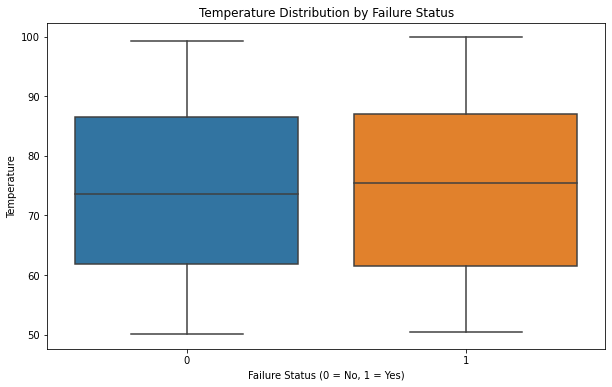

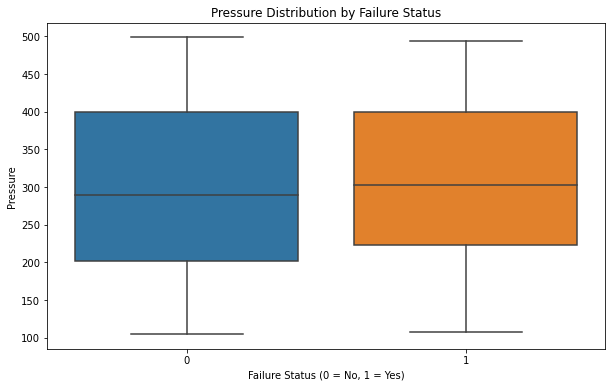

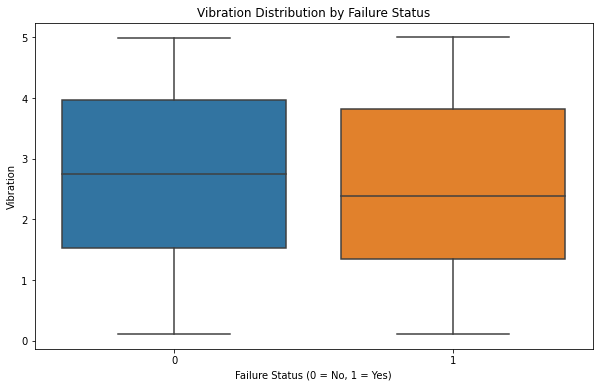

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of temperature by failure status
plt.figure(figsize=(10,6))
sns.boxplot(x='Failure', y='Temperature', data=data)
plt.title('Temperature Distribution by Failure Status')
plt.xlabel('Failure Status (0 = No, 1 = Yes)')
plt.ylabel('Temperature')
plt.show()

# Plot distribution of pressure by failure status
plt.figure(figsize=(10,6))
sns.boxplot(x='Failure', y='Pressure', data=data)
plt.title('Pressure Distribution by Failure Status')
plt.xlabel('Failure Status (0 = No, 1 = Yes)')
plt.ylabel('Pressure')
plt.show()

# Plot distribution of vibration by failure status
plt.figure(figsize=(10,6))
sns.boxplot(x='Failure', y='Vibration', data=data)
plt.title('Vibration Distribution by Failure Status')
plt.xlabel('Failure Status (0 = No, 1 = Yes)')
plt.ylabel('Vibration')
plt.show()


# Failure Probability Visualization

In [21]:
# Get predicted probabilities for both models (using the entire dataset)
y_pred_proba_gb = grid_search_gb.predict_proba(X)[:, 1]  # Gradient Boosting
y_pred_proba_xgb = grid_search_xgb.predict_proba(X)[:, 1]  # XGBoost

# Combine the predicted probabilities using weighted average
combined_pred_proba = (0.5 * y_pred_proba_gb) + (0.5 * y_pred_proba_xgb)


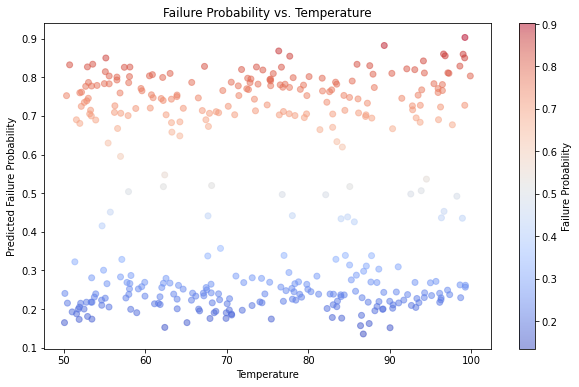

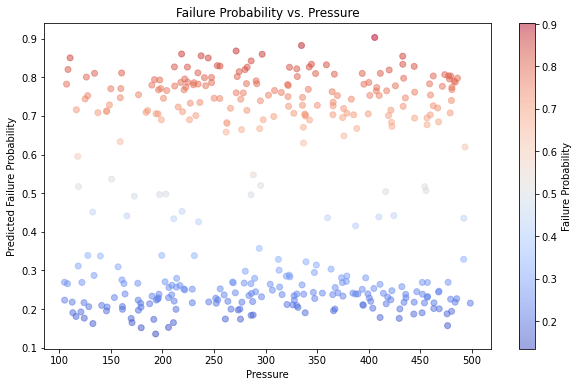

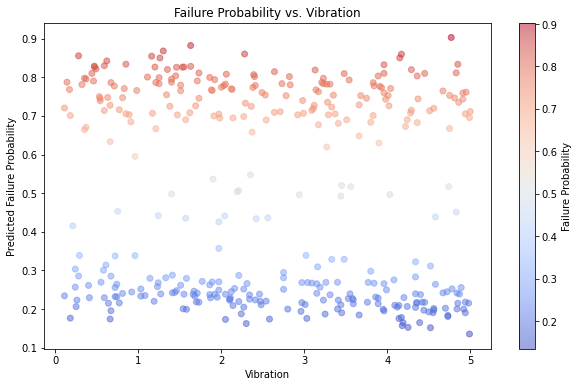

In [22]:
# Scatter plot: Failure probability vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(data['Temperature'], combined_pred_proba, alpha=0.5, c=combined_pred_proba, cmap='coolwarm')
plt.title('Failure Probability vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Predicted Failure Probability')
plt.colorbar(label='Failure Probability')
plt.show()

# Scatter plot: Failure probability vs. pressure
plt.figure(figsize=(10,6))
plt.scatter(data['Pressure'], combined_pred_proba, alpha=0.5, c=combined_pred_proba, cmap='coolwarm')
plt.title('Failure Probability vs. Pressure')
plt.xlabel('Pressure')
plt.ylabel('Predicted Failure Probability')
plt.colorbar(label='Failure Probability')
plt.show()

# Scatter plot: Failure probability vs. vibration
plt.figure(figsize=(10,6))
plt.scatter(data['Vibration'], combined_pred_proba, alpha=0.5, c=combined_pred_proba, cmap='coolwarm')
plt.title('Failure Probability vs. Vibration')
plt.xlabel('Vibration')
plt.ylabel('Predicted Failure Probability')
plt.colorbar(label='Failure Probability')
plt.show()


# Model Performance Visualization

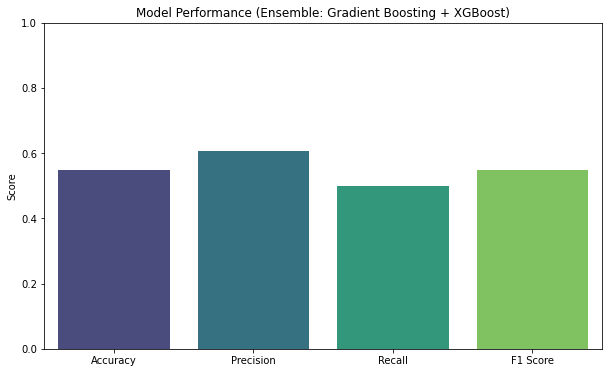

In [23]:
import numpy as np

# Performance metrics from the models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_combined, precision_combined, recall_combined, f1_combined]  # Results from the Ensemble Model

# Bar plot to visualize the metrics
plt.figure(figsize=(10,6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Model Performance (Ensemble: Gradient Boosting + XGBoost)')
plt.ylim(0, 1)  # Performance metrics are between 0 and 1
plt.ylabel('Score')
plt.show()


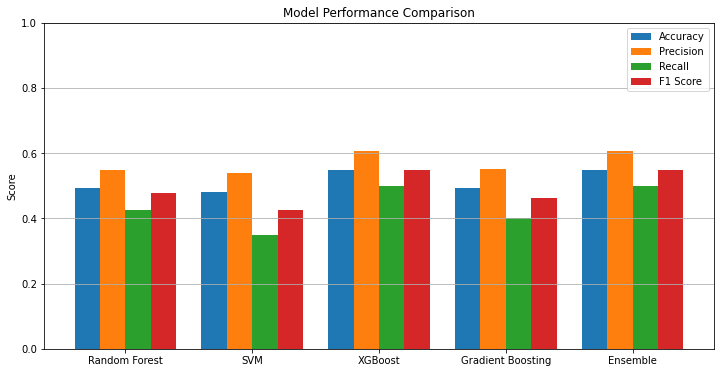

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Performance metrics for each model
models = ['Random Forest', 'SVM', 'XGBoost', 'Gradient Boosting', 'Ensemble']
accuracy = [accuracy_rf, accuracy_svm, accuracy_xgb, accuracy_gb, accuracy_combined]
precision = [precision_rf, precision_svm, precision_xgb, precision_gb, precision_combined]
recall = [recall_rf, recall_svm, recall_xgb, recall_gb, recall_combined]
f1_score = [f1_rf, f1_svm, f1_xgb, f1_gb, f1_combined]

# Set up the data for plotting
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_values = [accuracy, precision, recall, f1_score]

# Create a figure
plt.figure(figsize=(12, 6))

# Plot each metric as a separate bar
for i, metric in enumerate(metric_names):
    plt.bar(np.arange(len(models)) + i * 0.2, metric_values[i], width=0.2, label=metric)

# Set the x-ticks and labels
plt.xticks(np.arange(len(models)) + 0.3, models)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)  # Performance metrics are between 0 and 1
plt.legend()
plt.grid(axis='y')
plt.show()
